In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

## Применяем Pytorch для классификации

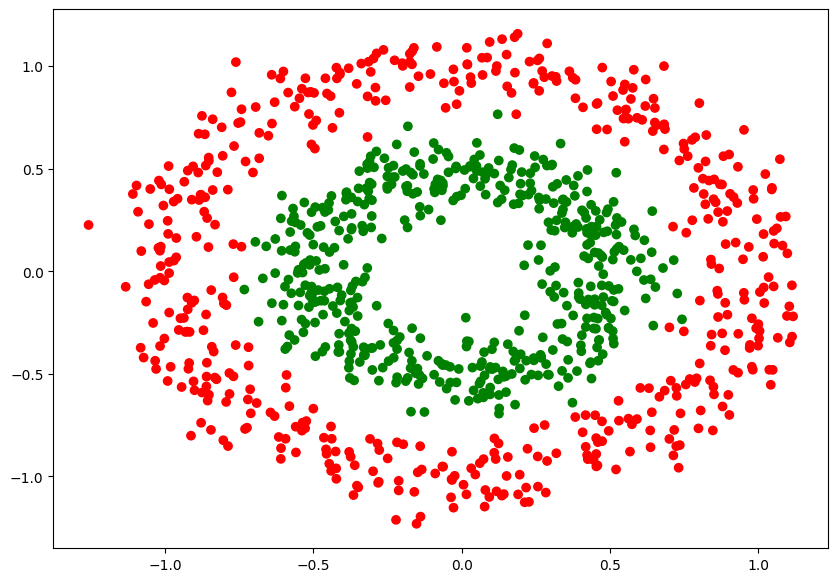

In [ ]:
from sklearn.datasets import make_circles

# генерируем 1000 точек
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42, factor=0.5)

# отрисовываем точки на плоскости, покрасив их в два цвета в зависимости от класса
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

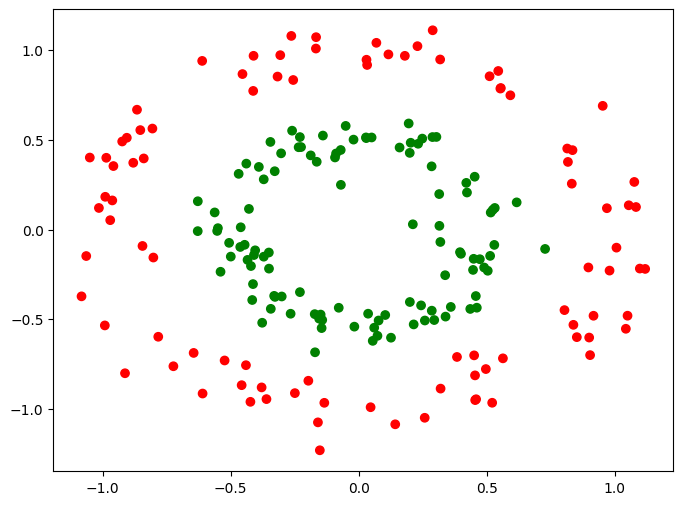

In [ ]:
colored_y = np.zeros(y_test.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

Давайте зададим нейронную сеть с двумя слоями. Пусть в скрытых слоях будет пять нейронов. В качестве функции активации выберем сигмоиду.

Нейросеть задается в виде класса, который наследуется от абстрактного класса Module. Для задания нейросети достаточно определить у класса методы init и forward. В методе init прописываются слои и артибуты сети, а в forward — то, как нейросеть будет обрабатывать данные, поданные ей на вход.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 4)
        self.act1 = nn.Sigmoid()
        self.fc2 = nn.Linear(4, 1)
        self.act2 = nn.Sigmoid() # можно заменить на nn.Tanh, nn.ReLU и т.д.


    def forward(self, x): #  x - данные, поданные на вход сети

        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)

        return x

In [ ]:
model = Net()

Посмотрим, что умеет наша необученная нейросеть. Получим ее ответы на тестовой выборке и визуализируем, к какому классу наша нейросеть отнесла какие точки тестовой выборки.

In [ ]:
nn_prediction = model(torch.FloatTensor(X_test))

nn_prediction = nn_prediction.tolist()

In [ ]:
nn_prediction

[[0.431686669588089],
 [0.4350607395172119],
 [0.428367555141449],
 [0.427789568901062],
 [0.4322480261325836],
 [0.4352935552597046],
 [0.4319247305393219],
 [0.43244341015815735],
 [0.4278949797153473],
 [0.4244815707206726],
 [0.4306159019470215],
 [0.42458057403564453],
 [0.43153998255729675],
 [0.4344995319843292],
 [0.43302345275878906],
 [0.4343859553337097],
 [0.4334501624107361],
 [0.4352985918521881],
 [0.4332151710987091],
 [0.43014857172966003],
 [0.4335530400276184],
 [0.4283873736858368],
 [0.42753884196281433],
 [0.42837902903556824],
 [0.433503657579422],
 [0.4310646653175354],
 [0.4282838702201843],
 [0.4361000061035156],
 [0.4254615008831024],
 [0.4349497854709625],
 [0.4282395541667938],
 [0.4310727119445801],
 [0.4273608922958374],
 [0.42915698885917664],
 [0.4316585063934326],
 [0.4295716881752014],
 [0.43279170989990234],
 [0.43221408128738403],
 [0.42911475896835327],
 [0.4278853237628937],
 [0.4301430284976959],
 [0.43320831656455994],
 [0.4317357838153839],
 [0

Переведем предсказания сети из вероятностей в формат нулей и единиц:

In [ ]:
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

In [ ]:
nn_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Визуализируем точки тестовой выборки и покрасим их в цвета в зависимости от того, к какому классу сеть отнесла эти точки:

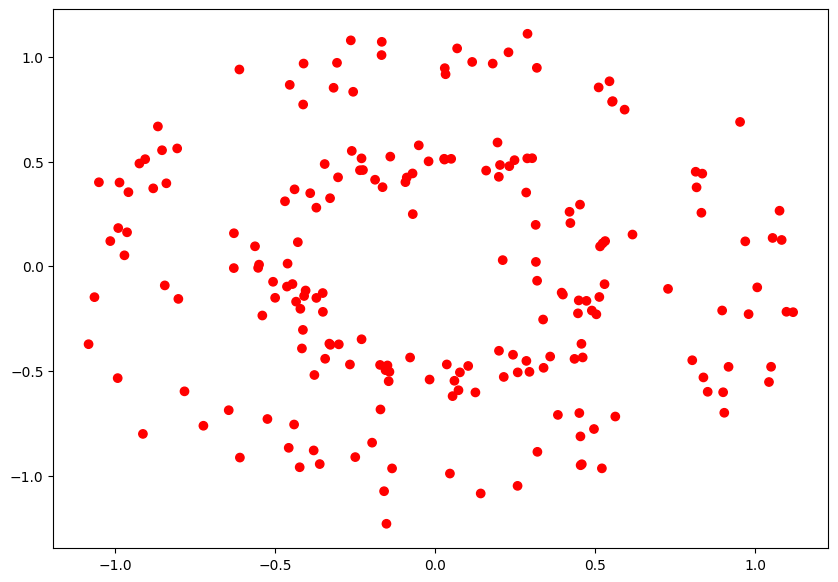

In [ ]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

Полученный результат ожидаем, поскольку наша нейронная сеть не обучена. Давайте обучим её.

In [ ]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        # Вычислим предсказания нашей модели
        y_pred = model(X)

        # Посчитаем значение функции потерь  на полученном предсказании
        loss = criterion(y_pred, y)

        # Выполним подсчёт новых градиентов
        loss.backward()
        # Выполним шаг градиентного спуска
        optimizer.step()
        # Обнулим сохраненные у оптимизатора значения градиентов
        # перед следующим шагом обучения
        optimizer.zero_grad()

    return model

Снова объявим нашу сеть:

In [ ]:
model = Net()

Объявим лосс-функцию и оптимизатор, и обучим сеть на 30 эпохах:

In [ ]:
criterion = torch.nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1) # size [1000] -> [1000, 1]

model = train(model, X_train, y_train, criterion, optimizer, 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Посмотрим теперь, каков будет результат.

In [ ]:
with torch.no_grad():
    nn_prediction = model(torch.FloatTensor(X_test))
    nn_prediction = nn_prediction.tolist()

nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

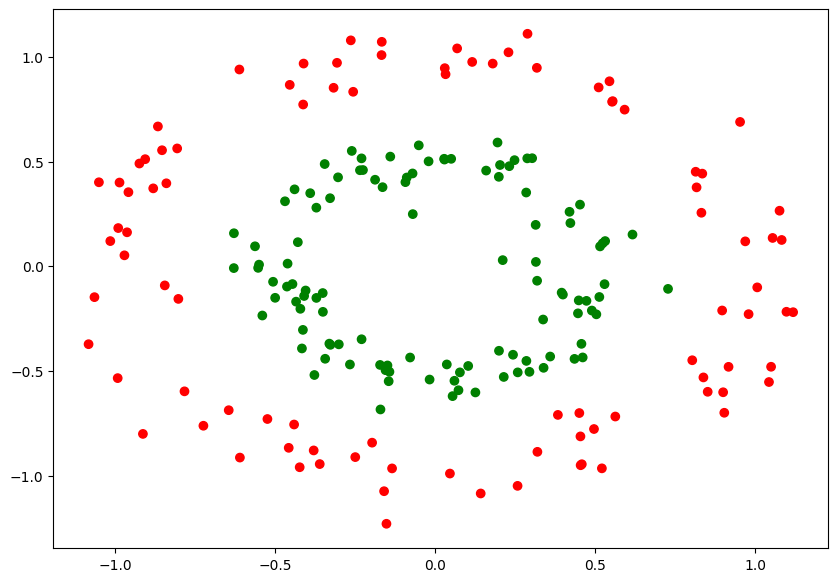

In [ ]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

## Ещё раз:

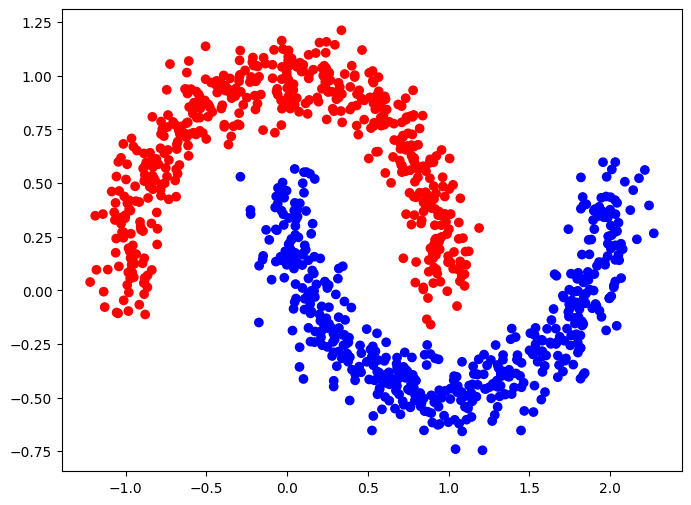

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

colors = ("red", "blue")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

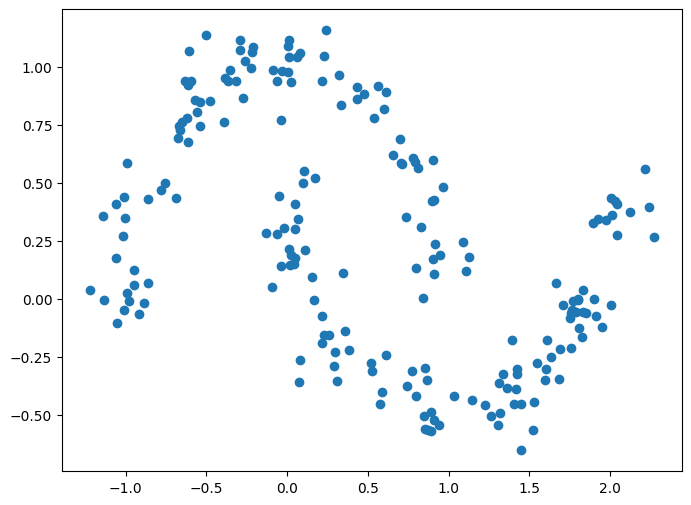

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.show()

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

#
#
#
#

    def forward(self, x):

#
#
#
#
        return x

In [ ]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
    for t in tqdm(range(num_epoch)):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return model

In [ ]:
model = Net()

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)

model = train(model, X_train, y_train, criterion, optimizer, 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
with torch.no_grad():
    nn_prediction = model(torch.FloatTensor(X_test))
    nn_prediction = nn_prediction.tolist()

nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

In [ ]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()